# IMPORTS

## Libraries

In [1]:
import warnings

import numpy  as np
import pandas as pd

import seaborn           as sns
import matplotlib.pyplot as plt

from scipy import stats

from IPython.display      import Image
from IPython.core.display import HTML


warnings.filterwarnings("ignore")
np.random.seed(0)

## Load Dataset

In [2]:
dfRaw = pd.read_csv('../../01-Data/churn.csv')

In [3]:
dfRaw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# DESCRIPTION

In [6]:
df01 = dfRaw.copy()

## Columns

In [7]:
df01.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## ~~Rename Columns~~

All the columns are in the camelize format already

## Data Dimensions

In [8]:
print(f'Number of Rows: {df01.shape[0]}')
print(f'Number of Columns: {df01.shape[1]}')

Number of Rows: 10000
Number of Columns: 14


## Data Types

In [9]:
df01.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Change Types

In [10]:
## Convert Objects type to categorical types >> more performatic
df01[df01.select_dtypes(include=['object']).columns] = df01.select_dtypes(include=['object']).astype('category')

## Convert Boolean integer columns to Boolean
df01[['HasCrCard', 'IsActiveMember', 'Exited']] = df01[['HasCrCard', 'IsActiveMember', 'Exited']].astype('bool')

In [11]:
df01.dtypes

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard              bool
IsActiveMember         bool
EstimatedSalary     float64
Exited                 bool
dtype: object

## Not a Number

### Sum

In [12]:
df01.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### ~~Fillout NA~~

there is no NA values

## Descriptive Statistical

In [13]:
# Numerical Attributes
numAttributes = df01.select_dtypes(include=['int64', 'float64'])
NotNumerial = ['RowNumber', 'CustomerId']
numAttributes = numAttributes[numAttributes.columns[~numAttributes.columns.isin(NotNumerial)]]

#Categorical Attributes
catAttributes = df01.select_dtypes(include=['category'])

#Boolean Attributes
boolAttributes = df01.select_dtypes(include=['bool'])

### Numerical Attributes

In [16]:
### Central Tendency -> Mean, Median, Mode
ct1 = pd.DataFrame(numAttributes.apply(np.mean)).T
ct2 = pd.DataFrame(numAttributes.apply(np.median)).T
ct3 = pd.DataFrame(stats.mode(numAttributes)[0])
ct3.columns = ct1.columns

### Dispersion -> std, min, max, range, skew, kurtosis, rsd
d1 = pd.DataFrame(numAttributes.apply(np.std)).T
d2 = pd.DataFrame(numAttributes.apply(min)).T
d3 = pd.DataFrame(numAttributes.apply(max)).T
d4 = pd.DataFrame(numAttributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(numAttributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(numAttributes.apply(lambda x: x.kurtosis())).T
d7 = d1 / ct1



# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2,ct3, d1, d7, d5, d6]).T.reset_index()
m.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Mode', 'Std','Relative Std', 'Skew', 'Kurtosis']
m

,Attributes,Min,Max,Range,Mean,Median,Mode,Std,Relative Std,Skew,Kurtosis
0,CreditScore,350.00,850.00,500.00,650.528800,652.000,850.00,96.648466,0.148569,-0.071607,-0.425726
1,Age,18.00,92.00,74.00,38.921800,37.000,37.00,10.487282,0.269445,1.011320,1.395347
2,Tenure,0.00,10.00,10.00,5.012800,5.000,2.00,2.892030,0.576929,0.010991,-1.165225
3,Balance,0.00,250898.09,250898.09,76485.889288,97198.540,0.00,62394.285254,0.815762,-0.141109,-1.489412
4,NumOfProducts,1.00,4.00,3.00,1.530200,1.000,1.00,0.581625,0.380098,0.745568,0.582981
5,EstimatedSalary,11.58,199992.48,199980.90,100090.239881,100193.915,24924.92,57507.617221,0.574558,0.002085,-1.181518


### Some considerations
---
> **CreditScore**
>> - Although it has a high std, it has a relative low std which shows a small degree of dispersion
>> - Both Skew and low kurtosis show that the distribution is close to a normal curve
>> - However close the average and median are, the mode is consiversibly greater and evidences the asymmetry of the distribution
>
> **Age**
>> - The age range is large and it will be interesting to group by bands
>> - According to indices considered to be higher than 0, this distribution does not approach a normal distribution
>
> **Tenure**
>> - According to the relative std the distribution presents a great degree of dispersion
>
> **Balance**
>> - According to the relative std the distribution presents a great degree of dispersion
>> - It's noted the pressure of considered amount of outliers that make the average is lower than the median and that the mode is 0.00, which impacts a lot both the kurtosis and std
>
> **NumOfProducts**
>> - As this attribute is of the whole nature and by the media, median and fashion indices show an unbalanced distribution according to the range
>
> **EstimatedSalary**
>> - As the distribution has a very high std and a relative std as well, it can be noted that it is a distribution with great dispersion

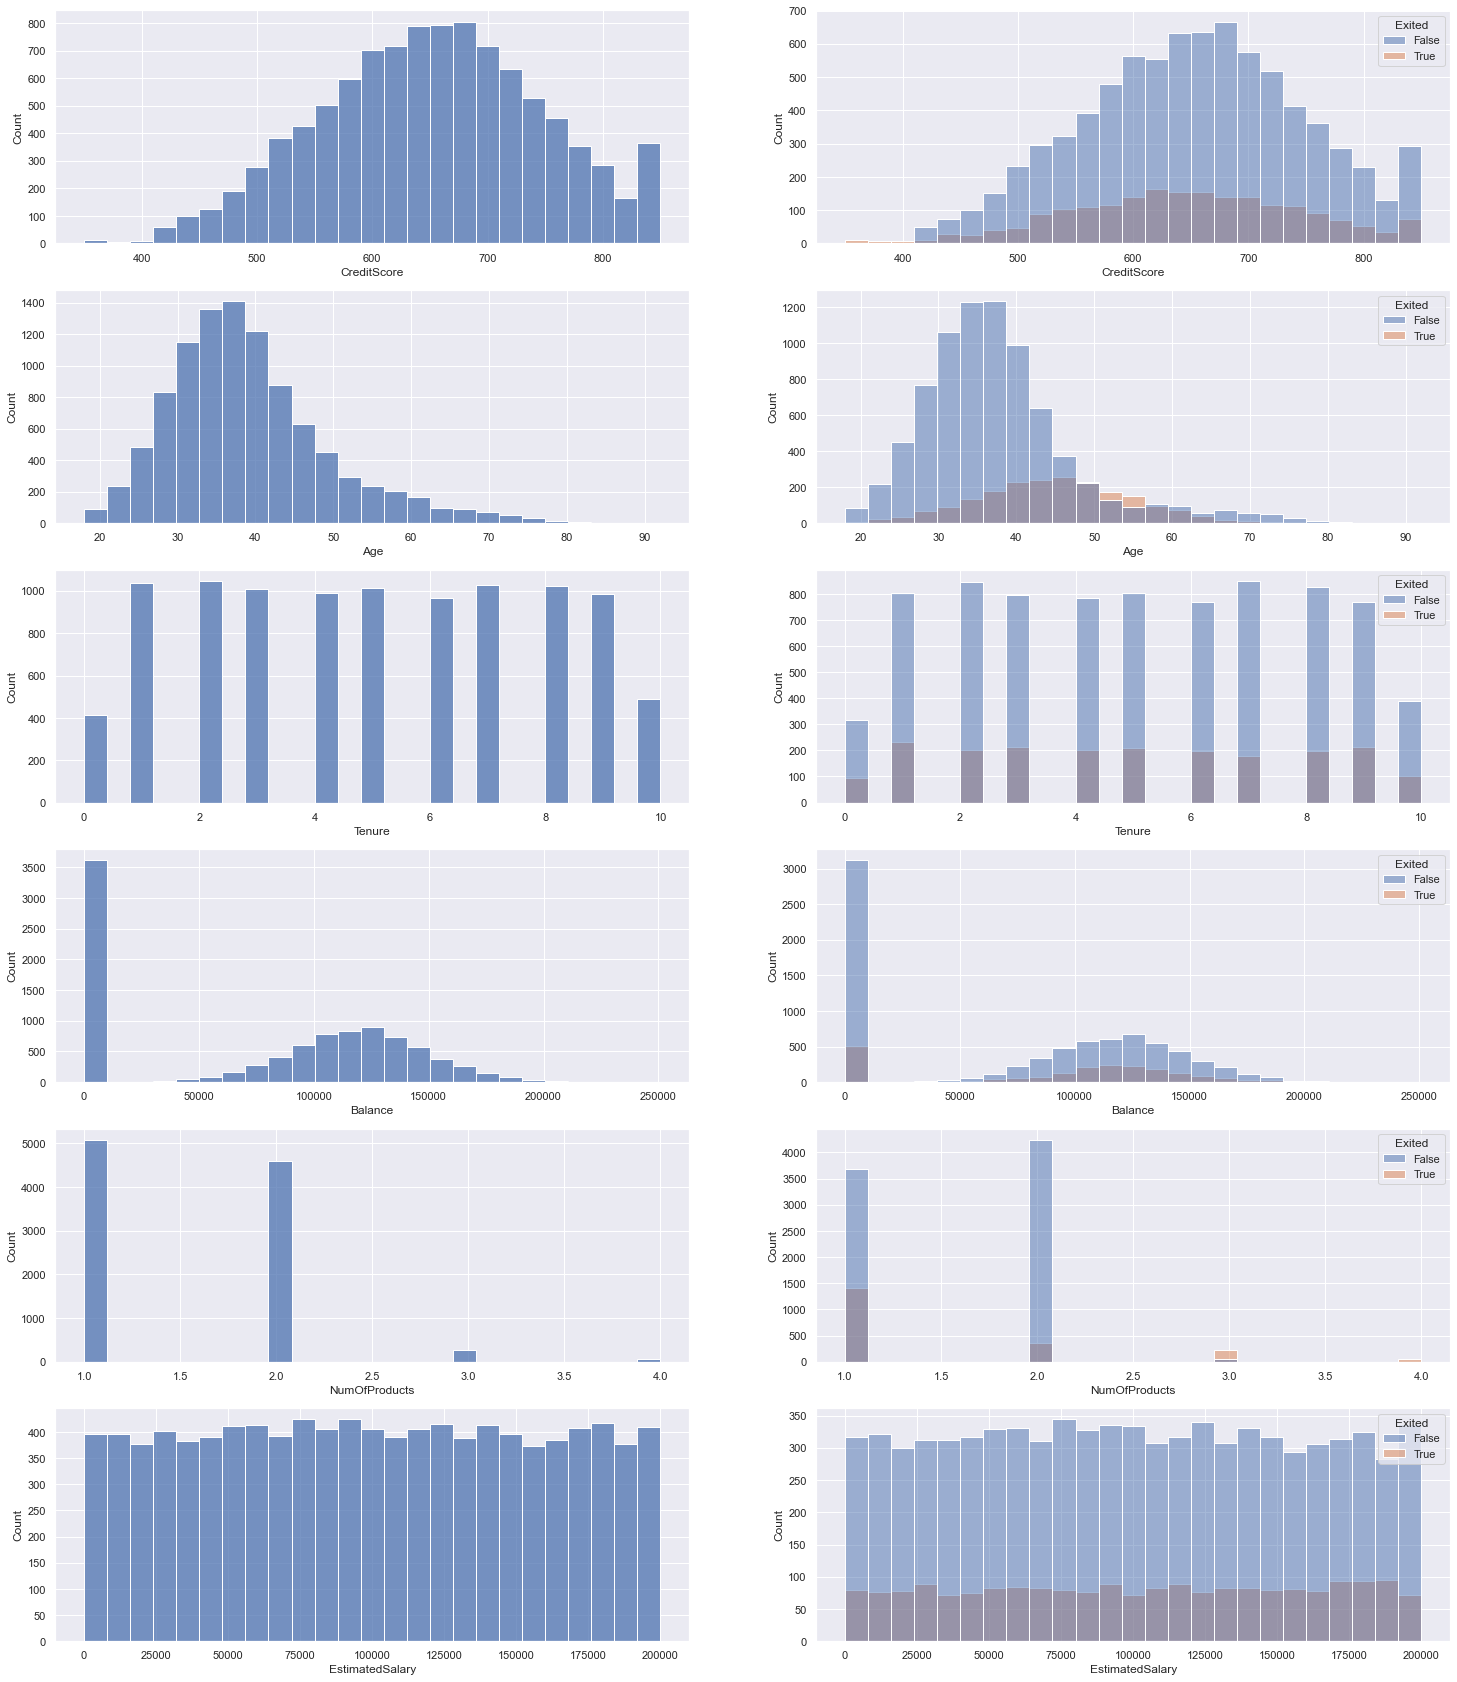

In [17]:
count = 1
attributesToInspect = m['Attributes'].tolist()
rows= len(attributesToInspect)
plt.figure(figsize=(25,5*rows))
for i in attributesToInspect:
    plt.subplot(rows, 2, count)
    sns.histplot(x=i, bins=25, data=df01)
    count += 1
    
    plt.subplot(rows, 2, count)
    sns.histplot(x=i, bins=25, hue='Exited', data=df01)
    count += 1
plt.show()

### Categorical Attributes

In [18]:
catAttributes.apply(lambda x: x.unique().shape[0])

Surname      2932
Geography       3
Gender          2
dtype: int64

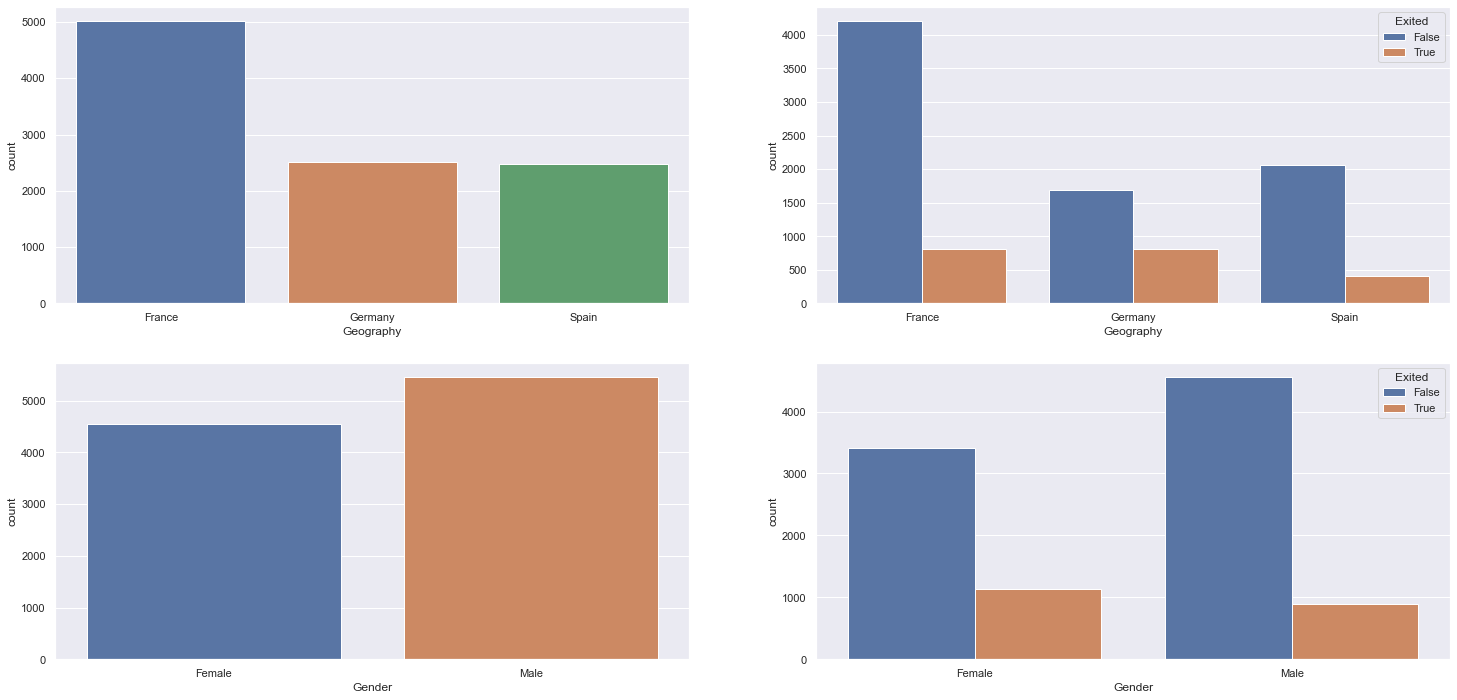

In [19]:
count = 1
attributesToInspect = ['Geography', 'Gender']
rows= len(attributesToInspect)
for i in attributesToInspect:
    plt.subplot(rows, 2, count)
    sns.countplot(x=i, data=df01)
    count += 1
    
    plt.subplot(rows, 2, count)
    sns.countplot(x=i, hue='Exited', data=df01)
    count += 1
plt.show()

## Boolean Attributes

In [20]:
dfBool = pd.DataFrame(boolAttributes.apply(lambda x: x.sum())).rename(columns={0:"Yes"})
dfBool['No'] = dfBool['Yes'].apply(lambda row: df01.shape[0] - row)
dfBool.head()

,Yes,No
HasCrCard,7055,2945
IsActiveMember,5151,4849
Exited,2037,7963


# Convert to .feather

In [21]:
df01.to_feather('00-Data/FeatherData/df01.feather')